In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\DV2041TU'

In [3]:
df = pd.read_csv("C:\\Users\\DV2041TU\\DeliveryTimeEstimation.csv") #Food Delivery Time Estimation Dataset
df

,order_id,distance_km,rider_speed,weather,delivery_time
0,ORD1000,7.80,30.94,Snowy,31.30
1,ORD1001,19.04,26.08,Stormy,64.03
2,ORD1002,14.77,19.29,Windy,49.46
3,ORD1003,12.17,34.41,Clear,18.61
4,ORD1004,3.54,30.54,Windy,14.76
...,...,...,...,...,...
495,ORD1495,7.39,12.75,Snowy,50.00
496,ORD1496,11.88,37.52,Clear,20.57
497,ORD1497,2.02,14.10,Clear,6.81
498,ORD1498,19.50,38.51,Windy,33.26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       500 non-null    object 
 1   distance_km    500 non-null    float64
 2   rider_speed    500 non-null    float64
 3   weather        500 non-null    object 
 4   delivery_time  500 non-null    float64
dtypes: float64(3), object(2)
memory usage: 19.7+ KB


In [5]:
df.describe()

,distance_km,rider_speed,delivery_time
count,500.000000,500.000000,500.000000
mean,10.221880,24.458540,38.613700
std,5.824315,8.564926,22.027547
min,0.600000,10.140000,1.330000
25%,5.207500,16.875000,22.327500
50%,10.510000,24.155000,34.975000
75%,15.242500,31.790000,51.442500
max,19.860000,39.990000,125.080000


In [6]:
df.describe(include='object')

,order_id,weather
count,500,500
unique,500,5
top,ORD1000,Rainy
freq,1,105


In [7]:
df.drop(['order_id'], axis=1, inplace=True)
df

,distance_km,rider_speed,weather,delivery_time
0,7.80,30.94,Snowy,31.30
1,19.04,26.08,Stormy,64.03
2,14.77,19.29,Windy,49.46
3,12.17,34.41,Clear,18.61
4,3.54,30.54,Windy,14.76
...,...,...,...,...
495,7.39,12.75,Snowy,50.00
496,11.88,37.52,Clear,20.57
497,2.02,14.10,Clear,6.81
498,19.50,38.51,Windy,33.26


In [8]:
df.isnull()
df.isnull().sum()

distance_km      0
rider_speed      0
weather          0
delivery_time    0
dtype: int64

In [9]:
df['weather'].value_counts()

weather
Rainy     105
Windy     104
Snowy      99
Stormy     96
Clear      96
Name: count, dtype: int64

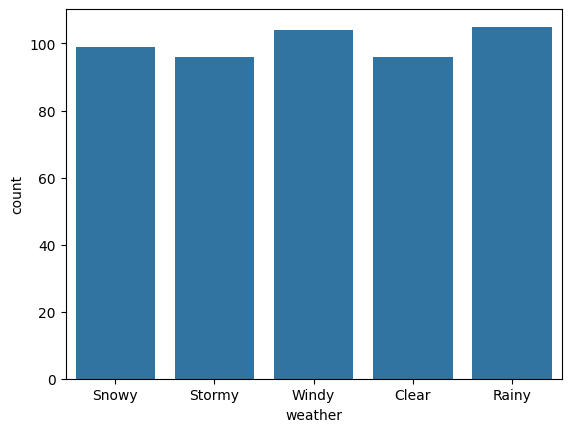

In [10]:
sns.countplot(x ='weather', data=df)
plt.show()

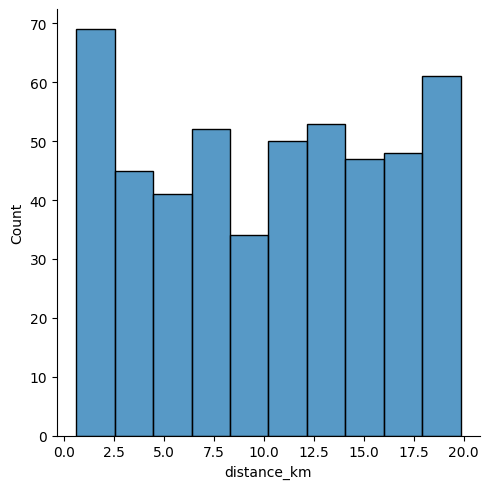

In [11]:
sns.displot(df['distance_km'], kind='hist')
plt.show()

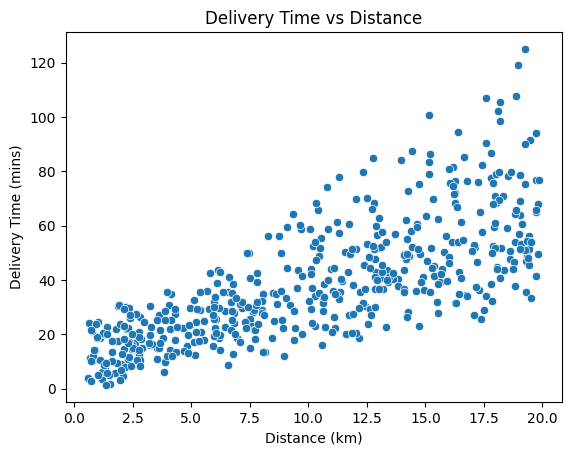

In [12]:
sns.scatterplot(x=df['distance_km'], y=df['delivery_time'])
plt.title('Delivery Time vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (mins)')
plt.show()

In [13]:
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df.corr()

,distance_km,rider_speed,delivery_time
distance_km,1.000000,0.010334,0.753789
rider_speed,0.010334,1.000000,-0.447951
delivery_time,0.753789,-0.447951,1.000000


In [14]:
df['distance_km'].skew()#negatively skewed

-0.025592486018151374

In [15]:
df['delivery_time'].skew()#moderately skewed

0.8591455834657734

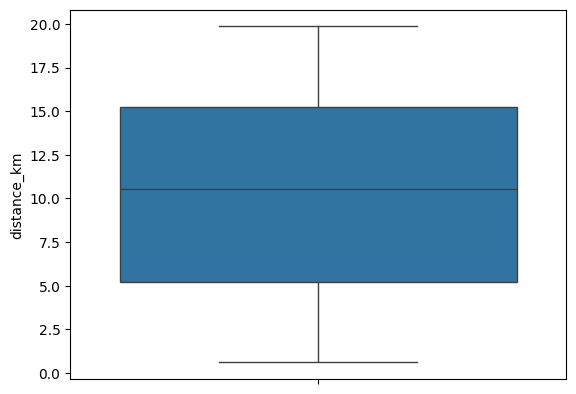

In [16]:
#Outlier detection of delivery time column
sns.boxplot(df['distance_km'])
plt.show()

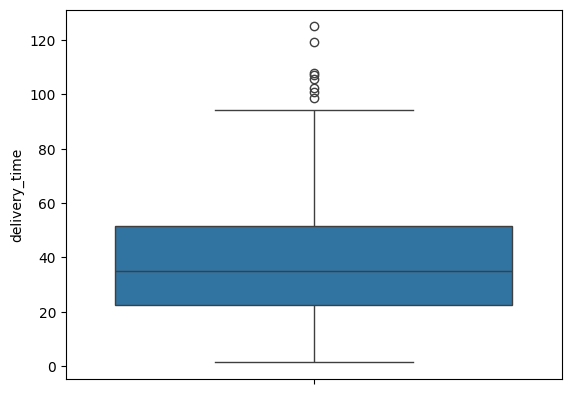

In [17]:
sns.boxplot(df['delivery_time'])
plt.show()

In [18]:
x=df['distance_km'] #independent variable
y=df['delivery_time'] #dependent variable

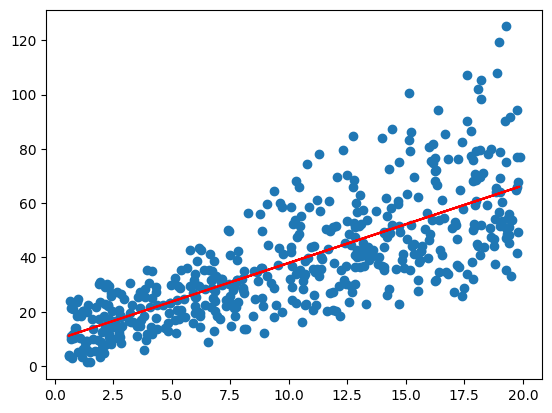

In [19]:
#Plotting best fit line on a scatter plot
plt.scatter(x,y)
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'r')
plt.show()

In [20]:
#Creating list of numeric columns
df.select_dtypes(include=[np.number]).columns.tolist()
#Creating dataframe of numeric columns
df_num = df[['distance_km', 'delivery_time']]
df_num

,distance_km,delivery_time
0,7.80,31.30
1,19.04,64.03
2,14.77,49.46
3,12.17,18.61
4,3.54,14.76
...,...,...
495,7.39,50.00
496,11.88,20.57
497,2.02,6.81
498,19.50,33.26


In [21]:
"""df.select_dtypes(include=['object']).columns.tolist()
df_dummies = pd.get_dummies(df['weather'])
df_dummies.tail()"""

"df.select_dtypes(include=['object']).columns.tolist()\ndf_dummies = pd.get_dummies(df['weather'])\ndf_dummies.tail()"

In [22]:
x = df_num.drop('delivery_time', axis=1) #distance
y = df_num['delivery_time']

In [23]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=12)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((350, 1), (350,), (150, 1), (150,))

In [24]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [25]:
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
print(lm.intercept_)

9.749651952449117


In [27]:
print(lm.coef_)

[2.76387127]


In [28]:
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
distance_km,2.763871


In [29]:
y_pred = lm.predict(x_test)

In [30]:
#Model Performance Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred) #coefficent of determination
r_squared

0.5600030907781071

In [31]:
from math import sqrt
rmse = sqrt(mse)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R Squared:",r_squared)

Mean Squared Error: 230.3765072678926
Root Mean Squared Error: 15.178158889268902
R Squared: 0.5600030907781071


In [32]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
475,76.97,64.640135
385,74.62,54.441450
167,34.92,21.192079
40,14.84,17.709601
350,68.17,38.245165
...,...,...
348,31.65,31.307848
251,32.12,31.888261
152,16.37,18.953343
249,52.04,57.094767


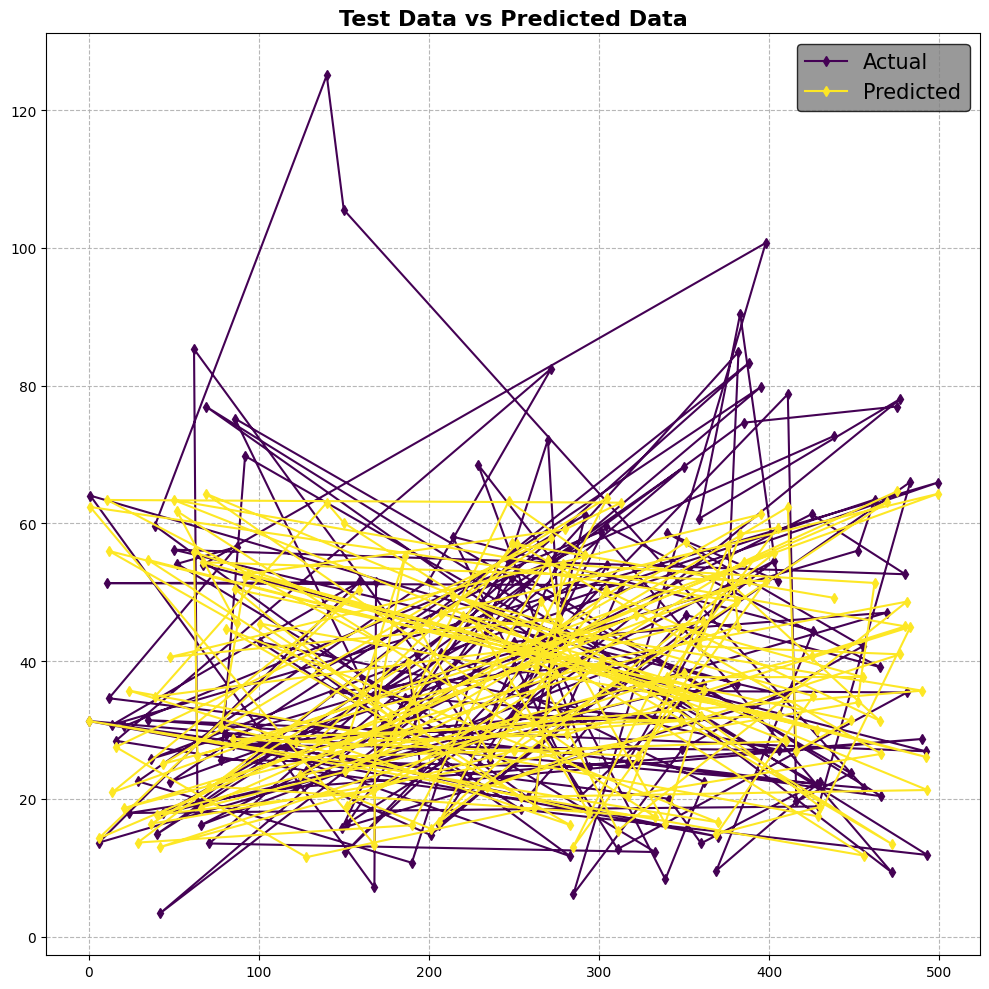

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
df1.plot(ax=ax, linewidth=1.5, marker='d', markersize=5, alpha=1, colormap='viridis')       
ax.set_title('Test Data vs Predicted Data', fontsize=16, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.9)
ax.legend(fontsize=15, loc='best', frameon=True, facecolor='gray', edgecolor='black')
plt.tight_layout()
plt.show()